# Credit Crad Fraud Detection

# Reference from Kaggle
"https://www.kaggle.com/mlg-ulb/creditcardfraud"
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



In [2]:
#importing all the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
#There are no missing values in the dataset

In [7]:
df.isnull().values.any()

False

In [8]:
#Fraud vs normal

In [9]:
fraud,n_fraud=df[df['Class']==1],df[df['Class']==0]


In [10]:
fraud.shape

(492, 31)

In [11]:
n_fraud.shape 

(284315, 31)

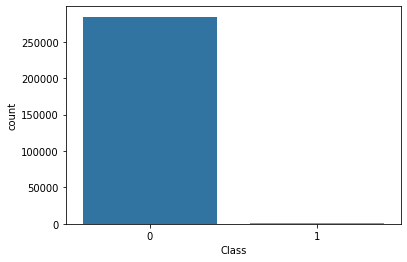

In [12]:
sns.countplot(df['Class'])

In [13]:
#data is heavily imbalanced so we need to work on outliers

Text(0.5, 1.0, 'Normal Transactions')

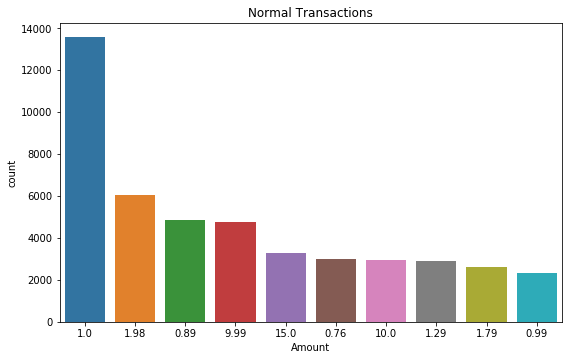

In [14]:
plt.figure(figsize = (9,5.5))
sns.countplot('Amount', order = n_fraud['Amount'].value_counts().index[:10], data = n_fraud)
plt.title('Normal Transactions')

Text(0.5, 1.0, 'Fraud Transactions')

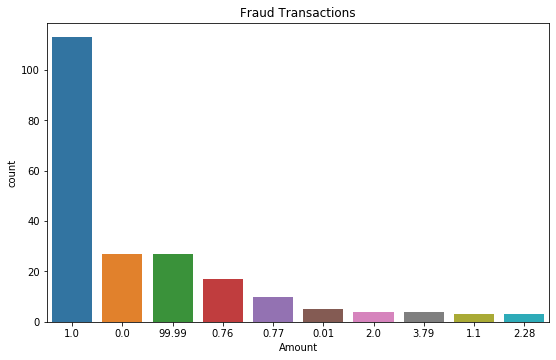

In [15]:

plt.figure(figsize = (9,5.5))
sns.countplot('Amount', order = fraud['Amount'].value_counts().index[:10], data = fraud)
plt.title('Fraud Transactions')

1.It is quite interesting to see that 99.99 dollars is in top 3 of fraud transactions but not in Normal transactions and It has same frequency of 0 dollars
2.Fraudsters still does the transaction with this amount even it is such a large money to be unnoticed by the customer .

In [16]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [17]:

df["Time"].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05])

In [18]:
pd.set_option('display.max_rows',200)

In [19]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
df['scaled_amount'] = m.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = m.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount', 'Time'], axis = 1, inplace= True)

In [20]:
df.head(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739,0.000006
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807,0.000006


In [21]:
minority_class=fraud.index
majority_class=n_fraud.index

In [22]:
minority_class_len=len(minority_class)
print(minority_class_len)

492


In [23]:
random_majority_class=np.random.choice(majority_class,size=minority_class_len,replace=False)

In [24]:
len(random_majority_class)

492

In [25]:
random_majority_class

array([ 80424, 136713, 283387, 238507,  87395,  33722,   5949,   6707,
        75712, 131730, 156223, 109837,  17745, 107607,  26770,  93737,
        46833, 164555,  62696, 130759,  78567, 253452, 130950,  97823,
       177248,  70732, 152807,  34755, 149062,  44239, 153375,  61743,
       175660,  25965, 253301,   7056,  21609, 185333, 149984,  62557,
       202556,  83969,  93877,  22796,  62660, 243780, 125290, 270181,
       160781, 240752, 144570, 221460, 237979, 104508,  35332,  96487,
        89129,  56576, 157875, 194913, 221263, 232004,  89253,  96779,
       107763, 133262,  54940, 220841,  32798, 250677, 179878,  79072,
        44036,  12884,  29573, 189314, 137314,  87818, 141804, 184153,
       198639, 225366, 155630,  60579,  59054, 216643,  22729, 102186,
       234202,   7616,  43051,  67550, 213880, 244635, 215457, 165144,
       283946, 190290, 123086, 251959,  28914, 125384,  43453,  36657,
       171822, 168730, 186529, 233440, 185445, 265352, 131845, 202119,
      

In [26]:
random_sampe_index=np.concatenate([minority_class,random_majority_class])

In [27]:
random_sampe_data=df.iloc[random_sampe_index]

In [28]:
random_sampe_data.index=range(0,len(random_sampe_data))

In [29]:
data=pd.DataFrame(random_sampe_data)

In [30]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,0.000000,0.002350
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,0.020591,0.002732
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.009339,0.025823
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.002297,0.040430
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,0.000039,0.043515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-1.594998,-0.420661,2.811693,0.596092,-0.106658,0.626458,0.748123,0.063950,1.036263,-1.089626,...,0.682163,0.281611,0.154949,0.480967,-0.403889,-0.193309,-0.134102,0,0.009731,0.044852
980,1.469755,-1.023654,-0.346454,-1.489453,-1.027194,-0.848776,-0.569307,-0.211766,-2.300464,1.676209,...,-0.135954,-0.155019,-0.009411,0.650566,-0.081440,-0.020272,-0.002509,0,0.001946,0.368802
981,2.034054,0.222075,-2.014723,0.438768,0.700353,-0.920466,0.463681,-0.359405,0.182141,-0.436824,...,-0.461040,0.191374,0.559963,-0.028217,0.336000,-0.069787,-0.029917,0,0.001067,0.949564
982,-0.307071,-0.361335,1.233346,0.646503,-2.114971,0.709604,-0.586376,-1.586710,-0.858649,0.760307,...,-0.660681,-0.880490,0.548128,0.573379,-0.108143,0.442776,0.178212,0,0.013001,0.355798


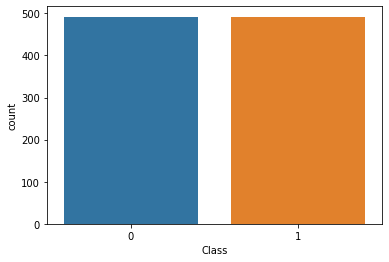

In [31]:
sns.countplot(data["Class"])

In [32]:
fraudcount=0
n_fraudcount=0
for i in data["Class"]:
    if i==0:
        n_fraudcount+=1
    else:
        fraudcount+=1
print(fraudcount,n_fraudcount) 

492 492


In [33]:
#Therefore we got a balanced Dataset

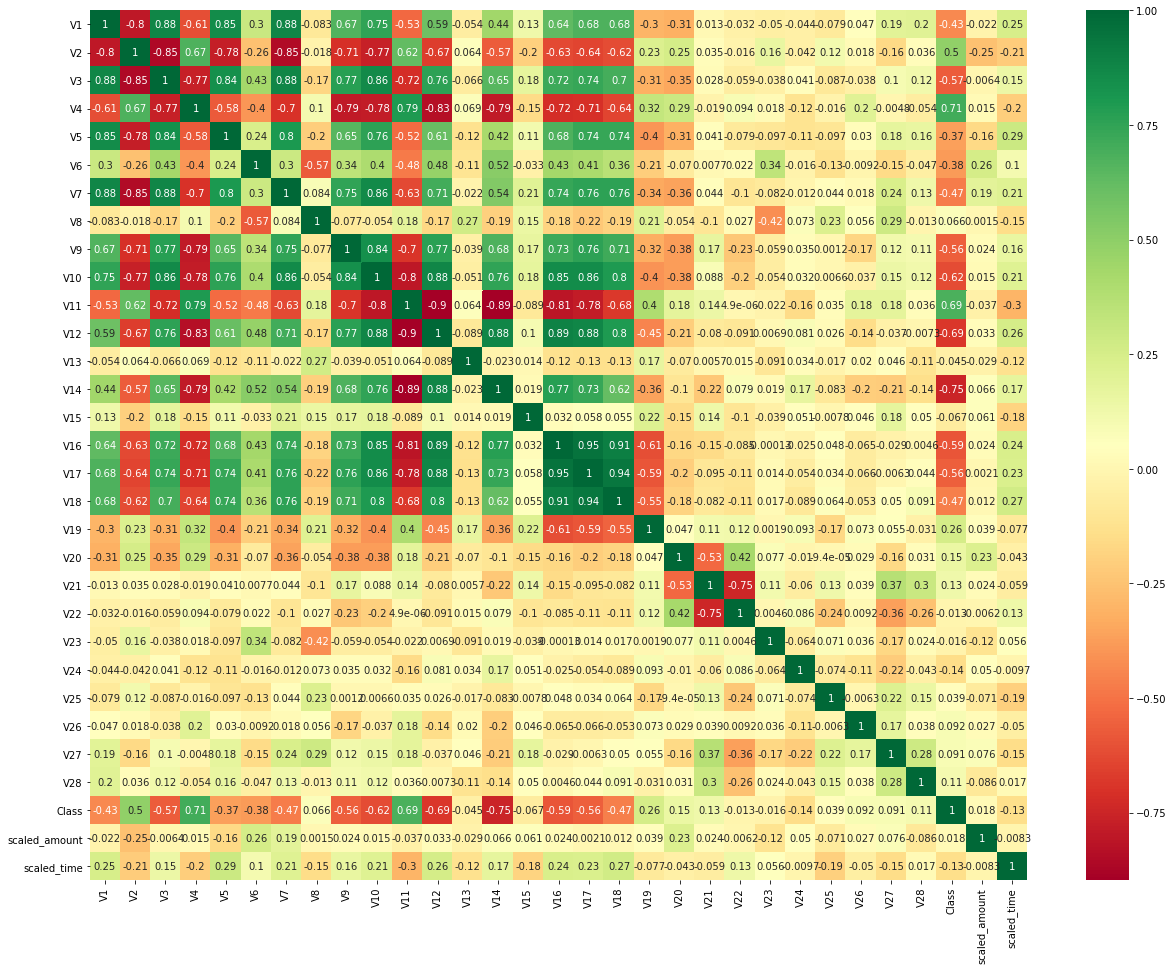

In [34]:
plt.figure(figsize = (21,16))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [35]:
data.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
V1,1.000000,-0.798075,0.878152,-0.612810,0.854530,0.299490,0.879552,-0.083310,0.667071,0.750341,...,-0.032024,-0.050433,-0.043501,-0.078881,0.046917,0.193449,0.202280,-0.431419,-0.022044,0.251144
V2,-0.798075,1.000000,-0.853172,0.674068,-0.776739,-0.256060,-0.846500,-0.018491,-0.707154,-0.769859,...,-0.016219,0.158940,-0.041626,0.117625,0.017762,-0.161825,0.036068,0.495718,-0.253127,-0.213526
V3,0.878152,-0.853172,1.000000,-0.767561,0.843665,0.431899,0.876494,-0.172913,0.772107,0.859350,...,-0.058610,-0.038240,0.041390,-0.087418,-0.038388,0.101034,0.120266,-0.565538,-0.006434,0.147464
V4,-0.612810,0.674068,-0.767561,1.000000,-0.577606,-0.398368,-0.697835,0.104908,-0.791163,-0.784386,...,0.093916,0.018100,-0.117538,-0.016344,0.202552,-0.004762,-0.054150,0.706387,0.015140,-0.202700
V5,0.854530,-0.776739,0.843665,-0.577606,1.000000,0.239550,0.802551,-0.201271,0.652535,0.755801,...,-0.079452,-0.096561,-0.113113,-0.097126,0.029737,0.176591,0.158111,-0.365679,-0.158739,0.289609
V6,0.299490,-0.256060,0.431899,-0.398368,0.239550,1.000000,0.295355,-0.573686,0.341785,0.404073,...,0.022206,0.338339,-0.015564,-0.126249,-0.009183,-0.154536,-0.046807,-0.384794,0.255558,0.103236
V7,0.879552,-0.846500,0.876494,-0.697835,0.802551,0.295355,1.000000,0.083527,0.750122,0.862036,...,-0.104313,-0.081667,-0.012285,0.043554,0.017555,0.236657,0.126986,-0.473293,0.185869,0.213495
V8,-0.083310,-0.018491,-0.172913,0.104908,-0.201271,-0.573686,0.083527,1.000000,-0.077323,-0.053880,...,0.027460,-0.418538,0.072641,0.225001,0.056395,0.287880,-0.012585,0.066235,0.001490,-0.146046
V9,0.667071,-0.707154,0.772107,-0.791163,0.652535,0.341785,0.750122,-0.077323,1.000000,0.837084,...,-0.233307,-0.059006,0.034628,0.001183,-0.171590,0.118107,0.108209,-0.559513,0.024177,0.155097
V10,0.750341,-0.769859,0.859350,-0.784386,0.755801,0.404073,0.862036,-0.053880,0.837084,1.000000,...,-0.200747,-0.053588,0.031730,0.006573,-0.036584,0.146322,0.120195,-0.620560,0.014956,0.213409


In [36]:
X = data.drop('Class', axis= 1).values
y = data['Class'].values


In [37]:
#splitting the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify = y)


<IPython.core.display.Javascript object>

In [38]:
#train data
print('Non-fraud data is', len(y_train[y_train == 0]))
print('fraud data is',len(y_train[y_train == 1]))


Non-fraud data is 344
fraud data is 344


In [39]:

#test data
print('Non-fraud data is', len(y_test[y_test == 0]))
print('fraud data is',len(y_test[y_test == 1]))


Non-fraud data is 148
fraud data is 148


# Using SMOTE taking sample of the data

In [40]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739,0.000006
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807,0.000006
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.002724,0.000012


In [41]:
df.shape

(284807, 31)

In [42]:
X1 = df.drop('Class', axis= 1)
y1 = df['Class']

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,n_jobs=-1)

In [44]:
X_new, y_new = sm.fit_sample(X1,y1)


In [45]:
print('Non-fraud data is', len(y_new[y_new == 0]))
print('fraud data is',len(y_new[y_new == 1]))

Non-fraud data is 284315
fraud data is 284315


In [46]:
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0.000006
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0.000006
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.125056,2.797045,-6.436962,3.250654,-1.673880,-2.737504,-2.301424,0.969237,-1.900690,-4.937166,...,0.647769,0.129735,0.201975,0.005538,-0.168130,0.569294,0.156908,-0.102253,0.003936,0.846840
568626,-3.352917,0.753401,-1.698278,0.863169,-1.186314,-0.406322,-1.652498,0.020940,-0.018209,-2.696694,...,0.342796,0.454379,-0.130009,-0.499223,-0.042935,0.987288,-1.389017,0.750979,0.003951,0.373566
568627,0.418201,1.290016,-1.977979,2.334900,-0.858962,-0.446977,-2.353758,0.620435,-1.364803,-2.888616,...,0.546788,0.316294,-0.309333,-0.716316,0.825396,-0.073520,0.560620,0.276735,0.000403,0.285492
568628,-1.269532,4.185133,-6.113043,5.037080,1.080631,-2.122858,-1.298991,0.575999,-3.684205,-6.215259,...,0.330215,-0.863163,-0.292751,-0.297741,0.296018,-0.013180,0.780460,0.397597,0.002205,0.840164


In [47]:

Smote_data = pd.DataFrame(X_new)#
Smote_data['Class'] = y_new


In [48]:
Smote_data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0.000000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0.000000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0.000006,0


In [49]:
Smote_data.shape

(568630, 31)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf = rf_clf.fit(X_new,y_new)

In [51]:
rf.feature_importances_

array([0.00532159, 0.01042622, 0.01985467, 0.04043913, 0.00431198,
       0.0009781 , 0.01780876, 0.00450749, 0.02081707, 0.09976932,
       0.07311812, 0.06597383, 0.00177915, 0.11334058, 0.00125677,
       0.02534971, 0.04721055, 0.01414186, 0.00329753, 0.00175505,
       0.00771916, 0.00117614, 0.00131527, 0.00081016, 0.00082328,
       0.00138012, 0.00900435, 0.00156635, 0.00209272, 0.00122763,
       0.40142736])

In [52]:
fimp_col = []
fimp = []

for i,column in enumerate(X1):
    fimp_col.append(column)
    fimp.append(rf.feature_importances_[i])
    
    

In [53]:
fimp_df = pd.DataFrame(zip(fimp_col,fimp), columns = ['Features', 'Feature_Importance'])


In [54]:
fimp_df.sort_values('Feature_Importance', ascending = False)


,Features,Feature_Importance
13,V14,0.113341
9,V10,0.099769
10,V11,0.073118
11,V12,0.065974
16,V17,0.047211
3,V4,0.040439
15,V16,0.025350
8,V9,0.020817
2,V3,0.019855
6,V7,0.017809


In [55]:
fimp_df=fimp_df.sort_values('Feature_Importance', ascending = False).reset_index()
fimp_df

,index,Features,Feature_Importance
0,13,V14,0.113341
1,9,V10,0.099769
2,10,V11,0.073118
3,11,V12,0.065974
4,16,V17,0.047211
5,3,V4,0.040439
6,15,V16,0.025350
7,8,V9,0.020817
8,2,V3,0.019855
9,6,V7,0.017809


In [56]:
droping_features = list(fimp_df['Features'][12:])
print(
    (droping_features))
print("Length: ",len(droping_features))

['V27', 'V21', 'V1', 'V8', 'V5', 'V19', 'scaled_amount', 'V13', 'V20', 'V28', 'V26', 'V23', 'V15', 'scaled_time', 'V22', 'V6', 'V25', 'V24']
Length:  18


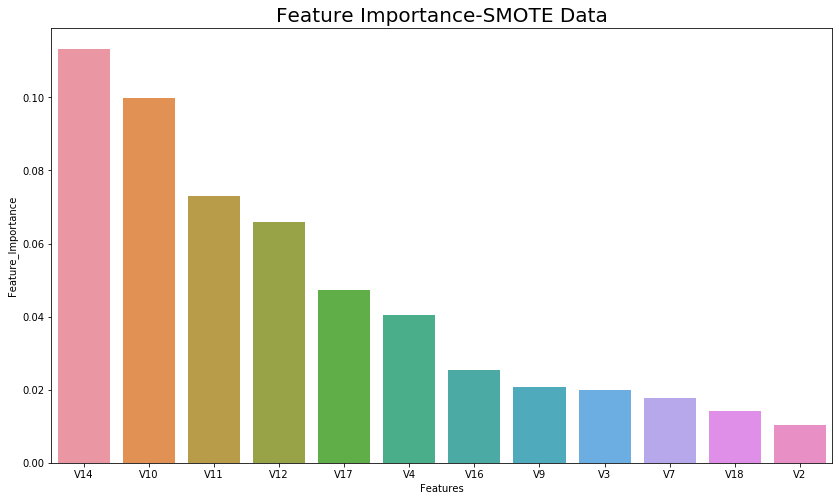

In [57]:
plt.figure(figsize = (14,8))
plt.title('Feature Importance-SMOTE Data',size = 20)
sns.barplot('Features','Feature_Importance', data = fimp_df[:12])

So top 12 Features covers almost 86% of variance

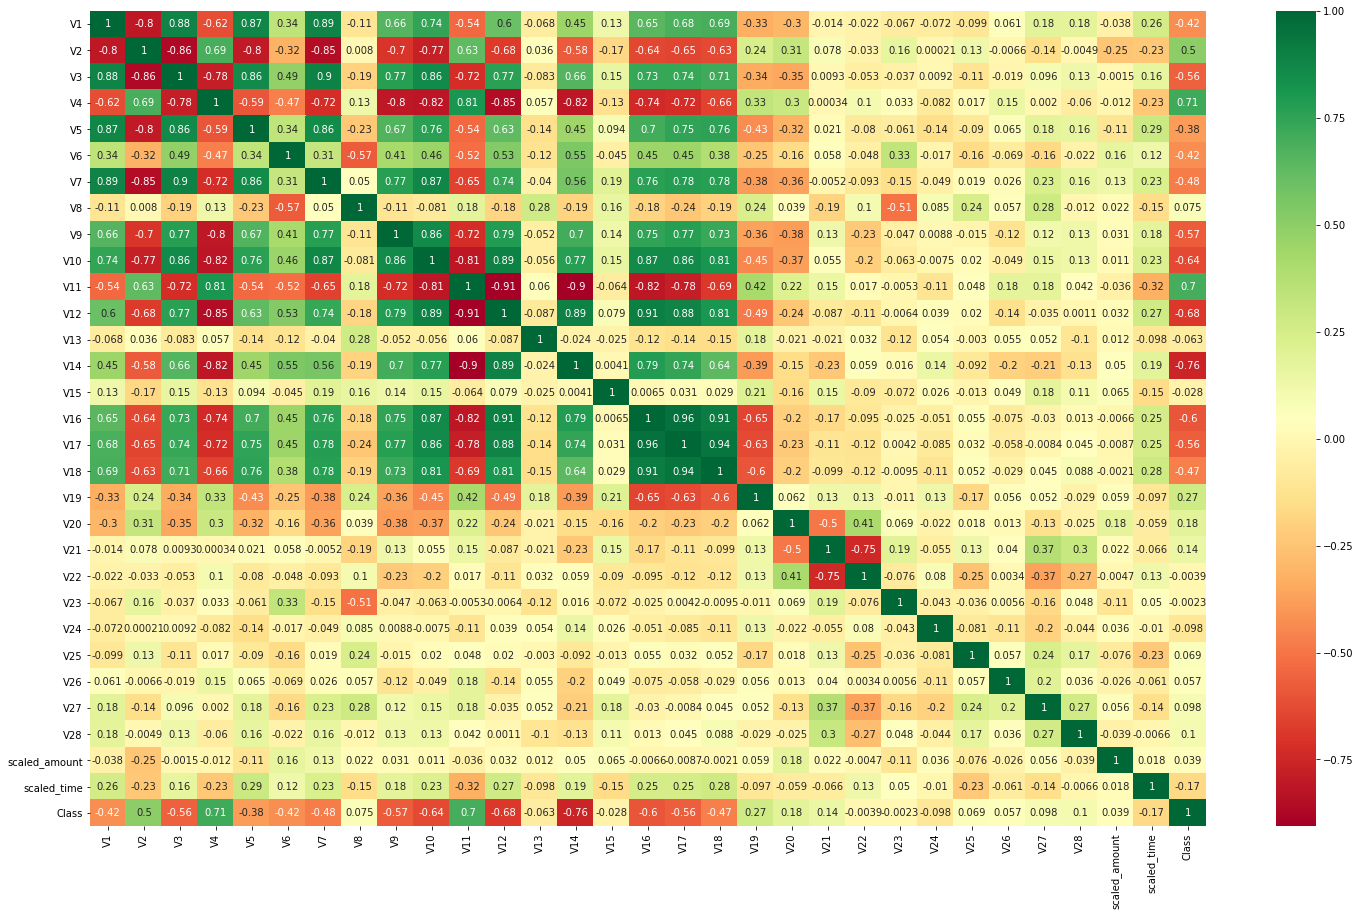

In [58]:
# correlation on SMOTE data
plt.figure(figsize = (25,15))
sns.heatmap(Smote_data.corr(), cmap='RdYlGn', annot = True)

1.V9,V10,V12,V14,V16,V17 are negatively correlated with the class


2.V2,V4,V11 are Positively Correlated with the class


In [59]:
Smote_data.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
V1,1.000000,-0.802716,0.882030,-0.619394,0.874447,0.341577,0.886538,-0.111091,0.659452,0.742848,...,-0.021694,-0.067056,-0.071731,-0.098704,0.061397,0.182538,0.178093,-0.038043,0.255950,-0.424365
V2,-0.802716,1.000000,-0.862251,0.689701,-0.797104,-0.317718,-0.853723,0.007964,-0.702485,-0.772322,...,-0.033339,0.158772,0.000207,0.128156,-0.006614,-0.144915,-0.004921,-0.245712,-0.229305,0.504350
V3,0.882030,-0.862251,1.000000,-0.780552,0.859977,0.485987,0.895706,-0.194761,0.770632,0.859283,...,-0.052639,-0.036673,0.009153,-0.112598,-0.018924,0.095842,0.126977,-0.001477,0.159355,-0.563322
V4,-0.619394,0.689701,-0.780552,1.000000,-0.594776,-0.471804,-0.721667,0.129386,-0.803108,-0.816588,...,0.103796,0.032965,-0.081553,0.016967,0.147453,0.002031,-0.059510,-0.012360,-0.230728,0.711908
V5,0.874447,-0.797104,0.859977,-0.594776,1.000000,0.337141,0.855985,-0.233597,0.666958,0.763712,...,-0.080488,-0.060569,-0.139860,-0.089550,0.064713,0.178584,0.160117,-0.109524,0.290732,-0.381130
V6,0.341577,-0.317718,0.485987,-0.471804,0.337141,1.000000,0.314910,-0.573296,0.413091,0.457348,...,-0.047793,0.326917,-0.016929,-0.157924,-0.069434,-0.161638,-0.022422,0.164964,0.124638,-0.424017
V7,0.886538,-0.853723,0.895706,-0.721667,0.855985,0.314910,1.000000,0.050118,0.771942,0.873660,...,-0.092796,-0.145122,-0.049345,0.019101,0.025565,0.229155,0.155108,0.129991,0.231741,-0.479668
V8,-0.111091,0.007964,-0.194761,0.129386,-0.233597,-0.573296,0.050118,1.000000,-0.110377,-0.081426,...,0.099970,-0.508765,0.085146,0.242084,0.057048,0.284822,-0.011990,0.022108,-0.147775,0.074748
V9,0.659452,-0.702485,0.770632,-0.803108,0.666958,0.413091,0.771942,-0.110377,1.000000,0.860398,...,-0.228131,-0.046659,0.008778,-0.014850,-0.118788,0.118616,0.131814,0.031357,0.179771,-0.572421
V10,0.742848,-0.772322,0.859283,-0.816588,0.763712,0.457348,0.873660,-0.081426,0.860398,1.000000,...,-0.202868,-0.062635,-0.007512,0.020317,-0.049491,0.150457,0.129563,0.011462,0.225410,-0.636066


In [135]:
# dropping the insignificant features
final_data = Smote_data.drop(droping_features, axis=1)

In [136]:
final_data

,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,-0.072781,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,0.266151,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,-1.340163,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,-0.185226,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,0.877737,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,2.797045,-6.436962,3.250654,-2.301424,-1.900690,-4.937166,3.068498,-5.293860,-7.040573,-3.845361,-2.536688,-0.865870,1
568626,0.753401,-1.698278,0.863169,-1.652498,-0.018209,-2.696694,1.703341,-3.653078,-6.215769,-2.759726,-5.175373,-2.138033,1
568627,1.290016,-1.977979,2.334900,-2.353758,-1.364803,-2.888616,2.807198,-2.916443,-4.540750,-1.834156,-5.444846,-0.634385,1
568628,4.185133,-6.113043,5.037080,-1.298991,-3.684205,-6.215259,3.491338,-7.647358,-12.230500,-1.571296,-2.948037,0.080201,1


from sklearn.model_selection import cross_validate
#cross_validate()
cross_validate(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    return_train_score=False,
    return_estimator=False,
    error_score=nan,
)

In [137]:
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate,KFold


log_reg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()


In [138]:
algo_list = list([log_reg,knn,svc,d_tree,rf_clf])
algo_name = list(['Logistic regression','K Nearest Neighbor','Support vector classifier', 'Decision Tree', 'Random Forest'])

In [104]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,make_scorer,f1_score,auc,roc_auc_score
scoring={
    "accuracy":make_scorer(accuracy_score),
    "precsion":make_scorer(precision_score),
    "recall":make_scorer(recall_score),
    "f1_score":make_scorer(f1_score)
}
cv_performance_metrics=list(['accuracy', 'test_Precision', 'test_recall', 'test_F1'])

In [74]:
from sklearn.model_selection import StratifiedKFold
fold=StratifiedKFold(n_splits=5)

In [75]:
def cross_validation(algo_list,X,y,fold,scoring):
    algo_score=[]
    for clf in algo_list:
        score=cross_validate(clf,X,y,cv=fold,scoring=scoring)
        perfomance_matrix=dict(zip(cv_performance_metrics,[np.mean(score[j]) for j in score]))
        algo_score.append(perfomance_matrix)
    return algo_score

In [76]:
result=cross_validation(algo_list,X,y,fold,scoring)

In [77]:
dict(zip(algo_name,result))

{'Logistic regression': {'accuracy': 0.015564632415771485,
  'test_Precision': 0.002991342544555664,
  'test_recall': 0.9237698124935253,
  'test_F1': 0.9649473085114195},
 'K Nearest Neighbor': {'accuracy': 0.002991914749145508,
  'test_Precision': 0.01196274757385254,
  'test_recall': 0.9298611830519009,
  'test_F1': 0.9756160822678039},
 'Support vector classifier': {'accuracy': 0.006981039047241211,
  'test_Precision': 0.00299224853515625,
  'test_recall': 0.9288511343623744,
  'test_F1': 0.9797046291714773},
 'Decision Tree': {'accuracy': 0.011368846893310547,
  'test_Precision': 0.0017959117889404298,
  'test_recall': 0.8262871646120378,
  'test_F1': 0.8650647714929096},
 'Random Forest': {'accuracy': 0.19208645820617676,
  'test_Precision': 0.009175491333007813,
  'test_recall': 0.9389982388894644,
  'test_F1': 0.9801694619723106}}

In [83]:
performance_metrics = list(['Accuracy', 'Precision', 'Recall', 'F1','AUC_ROC_Score'])


In [86]:
def model(algo,X_train,y_train, X_test, y_test):
    algo_performance = []
    for i in algo:
        clf = i.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        Accuracy = accuracy_score(y_test, y_pred)
        Precision = precision_score(y_test, y_pred)
        Recall = recall_score(y_test, y_pred)
        F1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)
        metrics = dict(zip(performance_metrics,[Accuracy,Precision,Recall,F1,auc_score]))
        algo_performance.append(metrics)
    return algo_performance

In [87]:

t_result = model(algo_list,X_train, y_train, X_test, y_test)


In [88]:
final_score = dict(zip(algo_name,t_result))
final_score

{'Logistic regression': {'Accuracy': 0.9425675675675675,
  'Precision': 0.958041958041958,
  'Recall': 0.9256756756756757,
  'F1': 0.9415807560137457,
  'AUC_ROC_Score': 0.9425675675675675},
 'K Nearest Neighbor': {'Accuracy': 0.9324324324324325,
  'Precision': 0.9637681159420289,
  'Recall': 0.8986486486486487,
  'F1': 0.9300699300699301,
  'AUC_ROC_Score': 0.9324324324324325},
 'Support vector classifier': {'Accuracy': 0.9391891891891891,
  'Precision': 0.9779411764705882,
  'Recall': 0.8986486486486487,
  'F1': 0.9366197183098591,
  'AUC_ROC_Score': 0.9391891891891891},
 'Decision Tree': {'Accuracy': 0.875,
  'Precision': 0.8580645161290322,
  'Recall': 0.8986486486486487,
  'F1': 0.877887788778878,
  'AUC_ROC_Score': 0.875},
 'Random Forest': {'Accuracy': 0.9459459459459459,
  'Precision': 0.9852941176470589,
  'Recall': 0.9054054054054054,
  'F1': 0.943661971830986,
  'AUC_ROC_Score': 0.9459459459459458}}

# Recall score of models on Undersampled data

1.Logistic regression - 0.925

2.Knn - 0.898

3.Random forest - 0.90

4.Decision tree - 0.89

5.Svc - 0.89

In [94]:
final_data.shape

(984, 13)

In [91]:

new_X = final_data.drop('Class', axis= 1).values
new_y = final_data['Class'].values

In [93]:
new_X.shape,new_y.shape

((984, 12), (984,))

In [145]:
kfold = KFold(n_splits = 15)

In [146]:
 for train, test in kfold.split(X,y):
    
        x_train = X[train]
        y_train = y[train]
        x_test = X[test]
        y_test = y[test]
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-3.007312,-7.222789,-1.681329,1.937204,-2.638214,1.475154,2.147882,-0.149405,0.510935,-1.237064,...,1.351853,-0.634641,-1.926584,-0.079239,-0.497176,0.986217,-0.428403,0.354925,0.083138,0.199037
1,1.072203,-0.124523,1.233197,1.718860,-0.652144,0.617414,-0.483343,0.246040,1.150816,-0.438059,...,-0.405421,-0.667544,0.073002,0.099879,0.446665,-0.512380,0.094842,0.030903,0.000576,0.493611
2,-0.683488,-0.370211,1.851204,-3.039093,-0.773747,-0.523900,-0.061225,-0.159765,-1.610511,0.937263,...,-0.234834,-0.137100,-0.289487,1.081762,0.549720,-0.212882,-0.026961,-0.103620,0.000576,0.760458
3,-1.801604,1.647698,0.548777,0.325799,-1.163296,-0.342604,-0.420587,1.187847,-0.455873,-1.039136,...,0.038151,-0.139562,0.293450,0.429461,-0.602248,0.048288,-0.589424,-0.059976,0.001365,0.238784
4,1.102691,-0.634440,0.442766,0.712671,-0.884149,0.052437,-0.471766,0.176124,-0.802768,0.871661,...,-0.380907,-0.639789,-0.001003,0.148531,0.419875,-0.341667,0.040885,0.019498,0.002645,0.178886
5,1.998815,-0.478623,-0.492031,0.379025,-0.536807,-0.102089,-0.713753,0.089795,1.592063,-0.149134,...,0.165494,0.658431,0.139214,0.578471,-0.077884,-0.233976,0.031274,-0.032999,0.000389,0.835843
6,-1.203620,1.125518,-0.619909,-2.013412,-0.785964,-1.457547,0.437986,0.097333,-1.069500,1.442771,...,0.115599,0.396070,0.160734,0.535902,-0.174062,-0.432089,0.200370,0.266038,0.001946,0.890649
7,-1.723531,-0.224380,2.466785,-0.087809,0.365316,-0.772259,0.017579,0.047844,-0.034692,-0.814728,...,0.179720,0.693581,-0.384451,0.716610,0.326041,0.519239,0.035945,0.020536,0.002750,0.340120
8,-1.332696,-0.439609,-1.304924,-4.560938,2.760633,1.996803,-0.015418,1.127049,1.148902,-2.645050,...,0.164043,0.087623,-0.306599,1.035670,0.629465,-1.020216,0.009225,-0.058277,0.001024,0.322434
9,1.492581,-1.186219,0.153766,-1.347789,-1.257792,-0.196188,-1.075520,0.035052,-1.387873,1.358774,...,-0.372398,-0.637107,0.035392,-0.494599,0.363212,-0.186226,0.035836,0.007026,0.000697,0.301333


In [163]:
# cross validation on various algorithms
def cross_validation(algo,X,y):
    
    algo_performance = []
    
    for train, test in kfold.split(X,y):
    
        x_train = X[train]
        y_train = y[train]
        x_test = X[test]
        y_test = y[test]
        
        sm = SMOTE(random_state=42)
        X_train_sam, y_train_sam = sm.fit_sample(x_train, y_train)
        print(pd.DataFrame( y_train_sam))
        for i in algo:
            clf = i.fit(X_train_sam, y_train_sam)
            y_pred = clf.predict(x_test)
            Accuracy = accuracy_score(y_test, y_pred)
            Precision = precision_score(y_test, y_pred)
            Recall = recall_score(y_test, y_pred)
            F1 = f1_score(y_test, y_pred)
           # auc_score = make_scorer((roc_auc_score(y_test,y_pred))
            metrics = dict(zip(performance_metrics,[Accuracy,Precision,Recall,F1]))
            algo_performance.append(metrics)
    return algo_performance

In [164]:
result=cross_validation(algo_list, new_X, new_y)

     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  1
980  1
981  1
982  1
983  1

[984 rows x 1 columns]
     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  1
980  1
981  1
982  1
983  1

[984 rows x 1 columns]
     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  1
980  1
981  1
982  1
983  1

[984 rows x 1 columns]
     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  1
980  1
981  1
982  1
983  1

[984 rows x 1 columns]
     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  1
980  1
981  1
982  1
983  1

[984 rows x 1 columns]
     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  1
980  1
981  1
982  1
983  1

[984 rows x 1 columns]
     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  1
980  1
981  1
982  1
983  1

[984 rows x 1 columns]
     0
0    1
1    1
2    1
3    1
4    1
..  ..
919  0
920  0
921  0
922  0
923  0

[924 rows x 1 columns]
     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  0
980  0
981  0
982  0
983  0

[984 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being se

     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  0
980  0
981  0
982  0
983  0

[984 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recal

     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  0
980  0
981  0
982  0
983  0

[984 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and

     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  0
980  0
981  0
982  0
983  0

[984 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being se

     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  0
980  0
981  0
982  0
983  0

[984 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and

     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  0
980  0
981  0
982  0
983  0

[984 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being se

     0
0    1
1    1
2    1
3    1
4    1
..  ..
979  0
980  0
981  0
982  0
983  0

[984 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
cv = dict(zip(algo_name,result))
cv

{'Logistic regression': {'Accuracy': 0.9848484848484849,
  'Precision': 1.0,
  'Recall': 0.9848484848484849,
  'F1': 0.9923664122137404},
 'K Nearest Neighbor': {'Accuracy': 0.9696969696969697,
  'Precision': 1.0,
  'Recall': 0.9696969696969697,
  'F1': 0.9846153846153847},
 'Support vector classifier': {'Accuracy': 0.9545454545454546,
  'Precision': 1.0,
  'Recall': 0.9545454545454546,
  'F1': 0.9767441860465117},
 'Decision Tree': {'Accuracy': 0.9848484848484849,
  'Precision': 1.0,
  'Recall': 0.9848484848484849,
  'F1': 0.9923664122137404},
 'Random Forest': {'Accuracy': 0.9848484848484849,
  'Precision': 1.0,
  'Recall': 0.9848484848484849,
  'F1': 0.9923664122137404}}

In [178]:
# cross validation on various algorithms
def cross_validation(algo,X,y):
    
    algo_performance = []
    
    for train, test in kfold.split(X,y):
        print(pd.DataFrame(X[66]))
        x_train = X[train]
        y_train= y[train]
        x_test = X[test]
        y_test = y[test]
        
      
        for i in algo:
            clf = i.fit(X_train, y_train)
            y_pred = clf.predict(x_test)
            Accuracy = accuracy_score(y_test, y_pred)
            Precision = precision_score(y_test, y_pred)
            Recall = recall_score(y_test, y_pred)
            F1 = f1_score(y_test, y_pred)
           # auc_score = make_scorer((roc_auc_score(y_test,y_pred))
            metrics = dict(zip(performance_metrics,[Accuracy,Precision,Recall,F1]))
            algo_performance.append(metrics)
    return algo_performance
cross_validation(algo_list, new_X, new_y)

            0
0   12.930505
1  -24.098872
2    6.203314
3  -16.519836
4   -3.897022
5   -8.650758
6    5.375434
7   -7.567214
8   -7.827891
9   -6.578042
10 -13.002459
11  -4.884467


ValueError: Found input variables with inconsistent numbers of samples: [688, 918]

In [179]:
for train, test in kfold.split(X,y):
    
        print(X[train])
        y_train = y[train]
        x_test = X[test]
        y_test = y[test]

[[-2.18854339e+01  1.29305051e+01 -2.40988719e+01 ...  4.53698639e-01
   3.89200021e-03  1.55672716e-01]
 [-2.25616993e+01  1.32089043e+01 -2.46438188e+01 ...  4.45919826e-01
   3.89200021e-03  1.55857910e-01]
 [-2.32379202e+01  1.34873858e+01 -2.51887730e+01 ...  4.38124805e-01
   3.89200021e-03  1.56031529e-01]
 ...
 [ 2.03405351e+00  2.22074572e-01 -2.01472306e+00 ... -2.99167498e-02
   1.06729319e-03  9.49563637e-01]
 [-3.07070848e-01 -3.61334539e-01  1.23334649e+00 ...  1.78211516e-01
   1.30005807e-02  3.55797722e-01]
 [ 2.32143559e-01  1.76656132e-01  8.75092464e-01 ...  2.57827899e-01
   1.55267415e-03  9.59430992e-01]]
[[-2.31222654e+00  1.95199201e+00 -1.60985073e+00 ... -1.43275875e-01
   0.00000000e+00  2.34964582e-03]
 [-3.04354062e+00 -3.15730712e+00  1.08846278e+00 ...  3.57642252e-02
   2.05907402e-02  2.73160794e-03]
 [-2.30334957e+00  1.75924746e+00 -3.59744743e-01 ... -1.53028797e-01
   9.33900999e-03  2.58229548e-02]
 ...
 [ 2.03405351e+00  2.22074572e-01 -2.0147230